# Bonus Explore Lesson

In [1]:
#standard ds/visualization imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#stats imports
import scipy.stats as stats
from sklearn.model_selection import train_test_split

#custom imports
import acquire
from prepare import train_validate_test_split

#remove warning boxes
import warnings
warnings.filterwarnings("ignore")

<hr style="border:2px solid gray">

## Let's use a new datasets we haven't see before!

### Taxis

In [2]:
taxis = sns.load_dataset('taxis')

In [3]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [4]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
taxis.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


<hr style="border:2px solid gray">

### Let's clean up our data

I did a little research ahead of time:  
- I found that pickup and dropoff are date/time objects so we won't be using those for this exploration example (so I'll drop them)
- I also found that pickup_zone and dropoff_zone are very messy but pickup_borough and dropoff_borough work in their place (so we'll drop zones) 

In [6]:
taxis = taxis.drop(['pickup','dropoff','pickup_zone','dropoff_zone'], axis=1)

In [7]:
#What do we have left?
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengers       6433 non-null   int64  
 1   distance         6433 non-null   float64
 2   fare             6433 non-null   float64
 3   tip              6433 non-null   float64
 4   tolls            6433 non-null   float64
 5   total            6433 non-null   float64
 6   color            6433 non-null   object 
 7   payment          6389 non-null   object 
 8   pickup_borough   6407 non-null   object 
 9   dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 502.7+ KB


In [8]:
#what does color hold?
taxis.color.value_counts()

yellow    5451
green      982
Name: color, dtype: int64

In [9]:
#what does payments hold?
taxis.payment.value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [10]:
#what does pickup_borough hold?
taxis.pickup_borough.value_counts()

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

In [11]:
#what does dropoff_borough hold?
taxis.dropoff_borough.value_counts()

Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: dropoff_borough, dtype: int64

In [12]:
#create our dummy variables for our object columns
dummy_df = pd.get_dummies(taxis[['color', \
                              'payment', \
                              'pickup_borough', \
                              'dropoff_borough']], dummy_na=False, \
                              drop_first=True)
    
# Concatenate dummy dataframe to original 
taxis = pd.concat([taxis, dummy_df], axis=1)

In [13]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   passengers                     6433 non-null   int64  
 1   distance                       6433 non-null   float64
 2   fare                           6433 non-null   float64
 3   tip                            6433 non-null   float64
 4   tolls                          6433 non-null   float64
 5   total                          6433 non-null   float64
 6   color                          6433 non-null   object 
 7   payment                        6389 non-null   object 
 8   pickup_borough                 6407 non-null   object 
 9   dropoff_borough                6388 non-null   object 
 10  color_yellow                   6433 non-null   uint8  
 11  payment_credit card            6433 non-null   uint8  
 12  pickup_borough_Brooklyn        6433 non-null   u

In [14]:
taxis = taxis.rename(columns={"payment_credit card": "payment_credit_card", "pickup_borough_Brooklyn": "pickup_Brooklyn","pickup_borough_Manhattan": "pickup_Manhattan", "pickup_borough_Queens": "pickup_Queens", "dropoff_borough_Brooklyn": "dropoff_Brooklyn","dropoff_borough_Manhattan": "dropoff_Manhattan", "dropoff_borough_Queens": "dropoff_Queens", "dropoff_borough_Staten Island":"dropoff_Staten_Island"})

In [15]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passengers             6433 non-null   int64  
 1   distance               6433 non-null   float64
 2   fare                   6433 non-null   float64
 3   tip                    6433 non-null   float64
 4   tolls                  6433 non-null   float64
 5   total                  6433 non-null   float64
 6   color                  6433 non-null   object 
 7   payment                6389 non-null   object 
 8   pickup_borough         6407 non-null   object 
 9   dropoff_borough        6388 non-null   object 
 10  color_yellow           6433 non-null   uint8  
 11  payment_credit_card    6433 non-null   uint8  
 12  pickup_Brooklyn        6433 non-null   uint8  
 13  pickup_Manhattan       6433 non-null   uint8  
 14  pickup_Queens          6433 non-null   uint8  
 15  drop

In [16]:
num_vars = ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']
cat_vars = ['color_yellow', 'payment_credit_card', 'pickup_Brooklyn', 'pickup_Manhattan', 'pickup_Queens', 'dropoff_Brooklyn', 'dropoff_Manhattan','dropoff_Queens', 'dropoff_Staten_Island']

### Let's split our data so we can explore

In [17]:
train, validate, test = train_validate_test_split(taxis)
train.shape, validate.shape, test.shape

((3602, 19), (1544, 19), (1287, 19))

## Now, Let's explore!

### Univariate:

What columns are we curious about?
- ```passengers```?
- ```distance```?
- ```pickup_borough_Brooklyn```?
- ```color_yellow```?

Categorical Variables:

color_yellow
1    3056
0     546
Name: color_yellow, dtype: int64
1    84.841755
0    15.158245
Name: color_yellow, dtype: float64


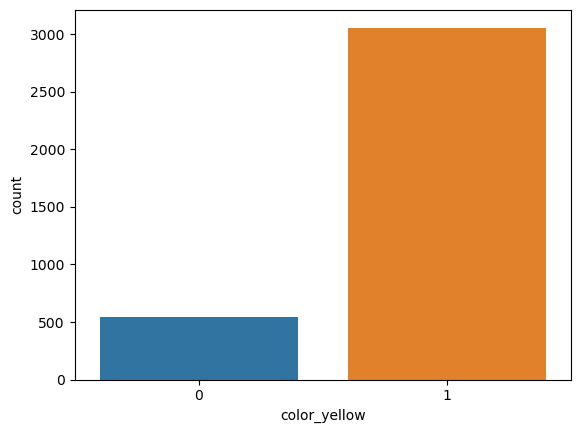

payment_credit_card
1    2536
0    1066
Name: payment_credit_card, dtype: int64
1    70.40533
0    29.59467
Name: payment_credit_card, dtype: float64


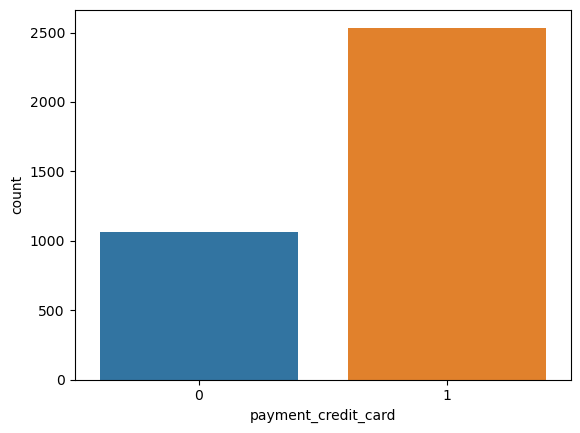

pickup_Brooklyn
0    3391
1     211
Name: pickup_Brooklyn, dtype: int64
0    94.142143
1     5.857857
Name: pickup_Brooklyn, dtype: float64


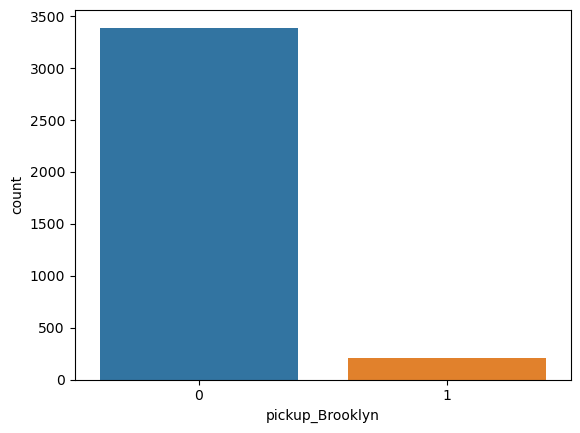

pickup_Manhattan
1    2967
0     635
Name: pickup_Manhattan, dtype: int64
1    82.370905
0    17.629095
Name: pickup_Manhattan, dtype: float64


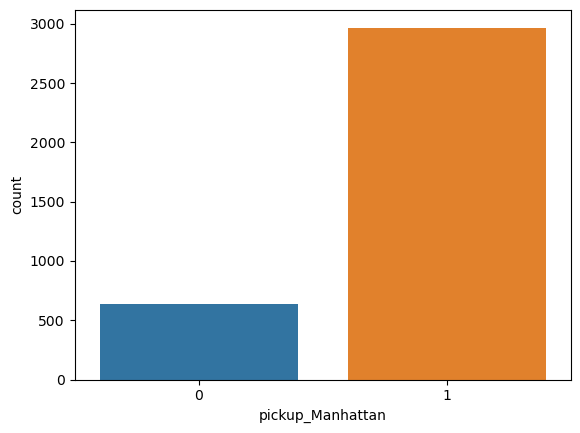

pickup_Queens
0    3239
1     363
Name: pickup_Queens, dtype: int64
0    89.922265
1    10.077735
Name: pickup_Queens, dtype: float64


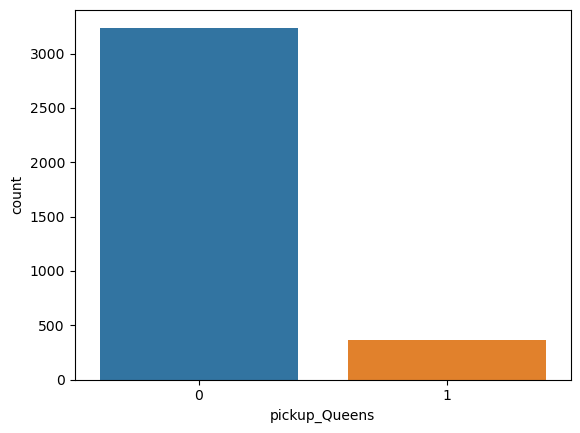

dropoff_Brooklyn
0    3321
1     281
Name: dropoff_Brooklyn, dtype: int64
0    92.198778
1     7.801222
Name: dropoff_Brooklyn, dtype: float64


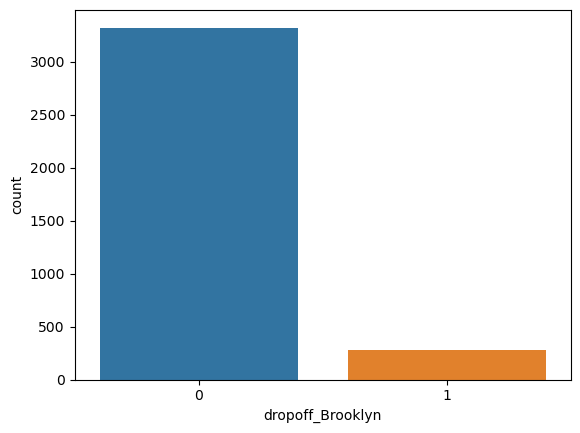

dropoff_Manhattan
1    2921
0     681
Name: dropoff_Manhattan, dtype: int64
1    81.093837
0    18.906163
Name: dropoff_Manhattan, dtype: float64


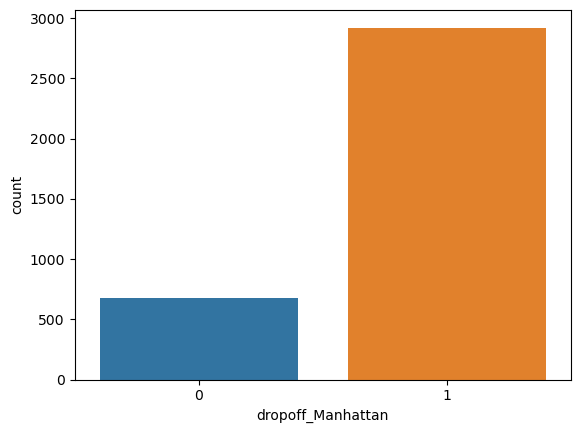

dropoff_Queens
0    3298
1     304
Name: dropoff_Queens, dtype: int64
0    91.560244
1     8.439756
Name: dropoff_Queens, dtype: float64


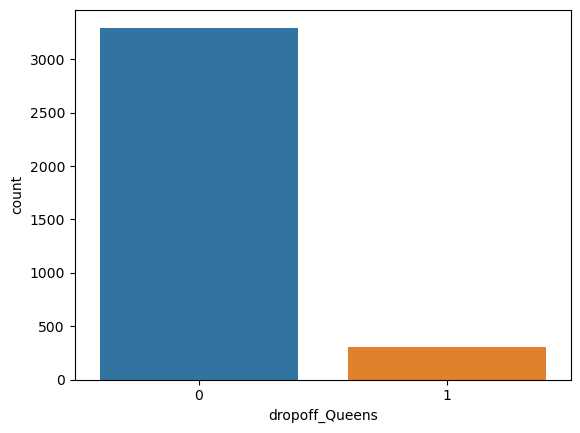

dropoff_Staten_Island
0    3601
1       1
Name: dropoff_Staten_Island, dtype: int64
0    99.972238
1     0.027762
Name: dropoff_Staten_Island, dtype: float64


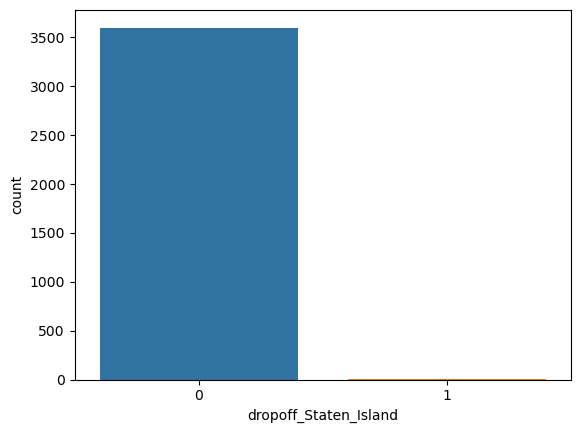

In [18]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

### Univariate for Numeric Variables

What do we have left that are numeric?

In [19]:
taxis.select_dtypes(include=['int64','float']).columns.to_list()

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

In [20]:
#another way to find the same info
num_vars

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

passengers


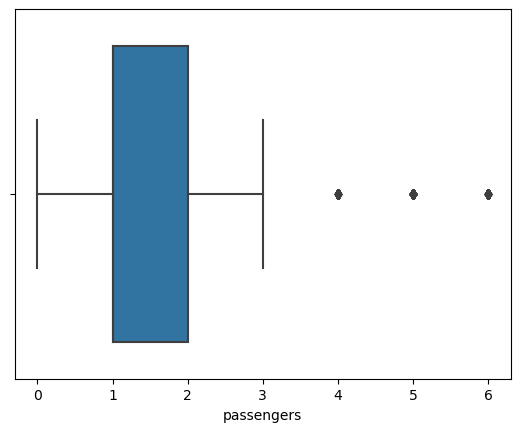

distance


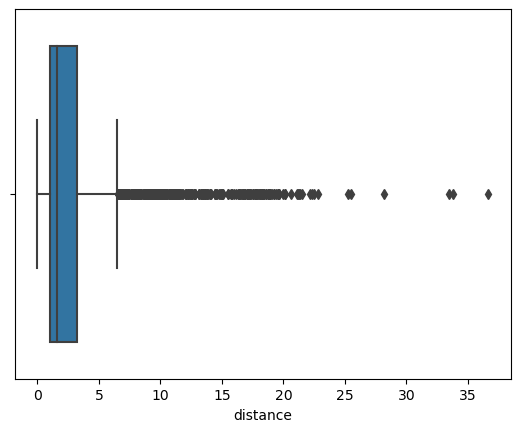

fare


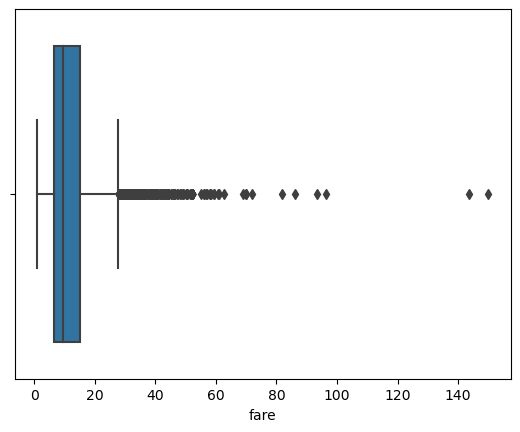

tip


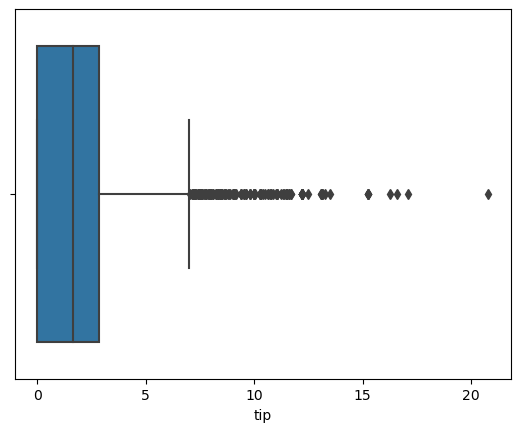

tolls


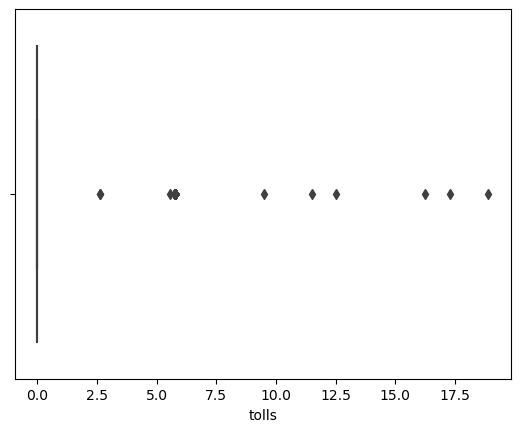

total


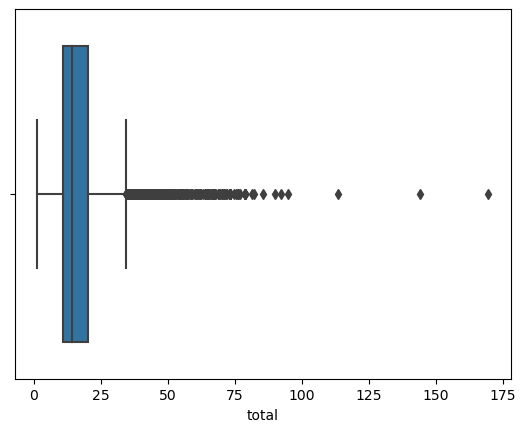

In [21]:
for col in num_vars:
    print(col)
    sns.boxplot(x=col, data=train)
    plt.show()

## Bivariate:

Now now get into having a target variable? What are we trying to determine? That will be our 'y-axis'
<br>
I like ```fare``` as a target

<b>Questions</b>:
- Does the distance effect the fare??

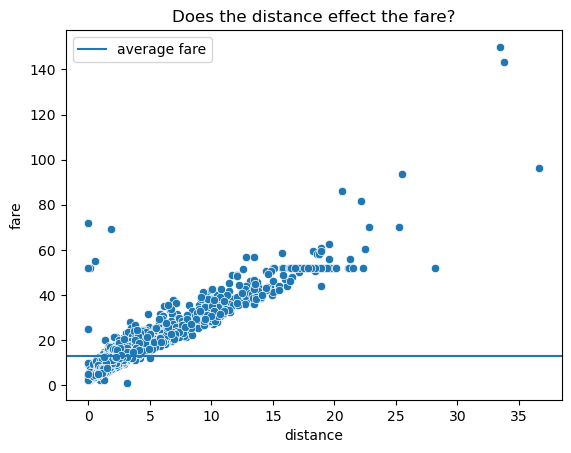

In [22]:
plt.title('Does the distance effect the fare?')
sns.scatterplot(x='distance', y='fare', data=train)
pop_fare_rate = train.fare.mean()
plt.axhline(pop_fare_rate, label = 'average fare')
plt.legend()

### Multivariate:

<b>Question</b>: Does payment type and passenger number affect the fare?

<AxesSubplot:xlabel='passengers', ylabel='fare'>

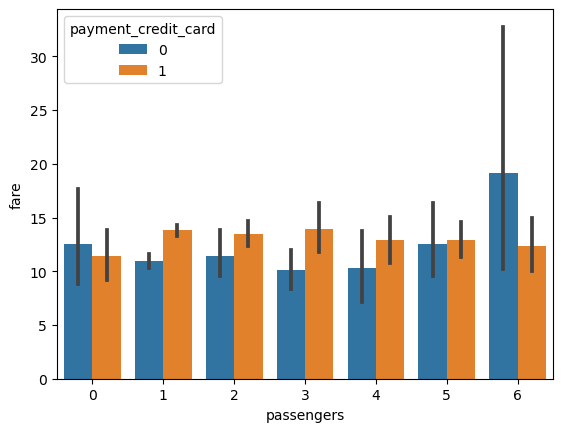

In [23]:
sns.barplot(x='passengers', y='fare', hue='payment_credit_card', data=train)

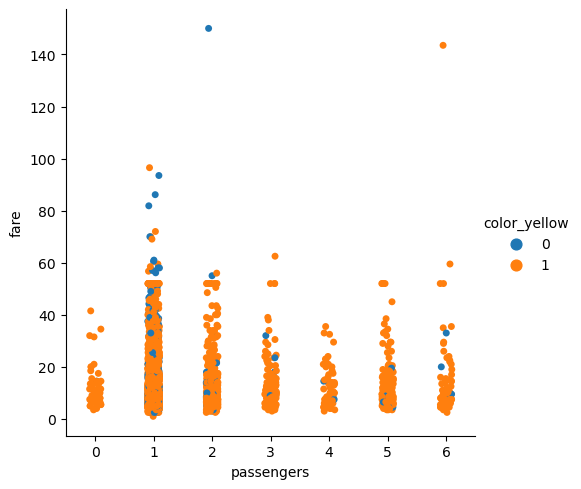

In [24]:
# Using a Catplot
sns.catplot(x="passengers", y="fare", data=train, hue="color_yellow")

In [25]:
taxis.total.value_counts()

9.30     146
11.30    129
11.80    122
9.80     121
10.30    121
        ... 
57.80      1
56.31      1
23.24      1
55.68      1
26.82      1
Name: total, Length: 898, dtype: int64